In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")


In [3]:
# Load the CSV file
file_path = './master_ufo_data.csv'
ufo_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
ufo_data.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude,FIPS,State,County Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,Estimated Population 2022,BIRTHS 2022,DEATHS 2022
0,1930-06-01 22:00:00,Ithaca/Freeville,NY,US,triangle,1200.0,Very Large Triangle Shapped Object,1/19/2005,42.509167,-76.393804,36109,NY,Tompkins County,14405.0,16.0,72025,104777,676,674
1,1931-02-15 14:00:00,Holyoke (6-8 Miles Southwest Of),CO,US,oval,60.0,In the winter of 1931&#44 I saw a flying machi...,6/18/2004,40.584444,-102.301944,8095,CO,Phillips County,489.0,11.2,68571,15304,214,318
2,1931-06-01 13:00:00,Abilene,KS,US,disc,1800.0,This is a what my mother related to me regardi...,2/14/2006,38.917222,-97.213611,20041,KS,Dickinson County,1840.0,10.2,63136,18028,158,235
3,1933-04-18 19:00:00,New York Worlds Fair,NY,US,light,1800.0,The object seemed to be a lighted amorphous cl...,4/16/2005,40.759941,-73.849168,36081,NY,Queens County,295825.0,13.1,80180,2278029,24973,17897
4,1934-09-15 15:30:00,Valley City (6.5 Miles East Of),ND,US,disc,5.0,Two brothers observe&#44 hear&#44 three black ...,6/12/2008,46.923333,-98.002778,38003,ND,Barnes County,1177.0,11.5,67058,10758,95,162


In [4]:
ufo_data_usa = ufo_data[ufo_data['country'].str.lower() == 'us']
ufo_data_usa.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude,FIPS,State,County Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,Estimated Population 2022,BIRTHS 2022,DEATHS 2022
0,1930-06-01 22:00:00,Ithaca/Freeville,NY,US,triangle,1200.0,Very Large Triangle Shapped Object,1/19/2005,42.509167,-76.393804,36109,NY,Tompkins County,14405.0,16.0,72025,104777,676,674
1,1931-02-15 14:00:00,Holyoke (6-8 Miles Southwest Of),CO,US,oval,60.0,In the winter of 1931&#44 I saw a flying machi...,6/18/2004,40.584444,-102.301944,8095,CO,Phillips County,489.0,11.2,68571,15304,214,318
2,1931-06-01 13:00:00,Abilene,KS,US,disc,1800.0,This is a what my mother related to me regardi...,2/14/2006,38.917222,-97.213611,20041,KS,Dickinson County,1840.0,10.2,63136,18028,158,235
3,1933-04-18 19:00:00,New York Worlds Fair,NY,US,light,1800.0,The object seemed to be a lighted amorphous cl...,4/16/2005,40.759941,-73.849168,36081,NY,Queens County,295825.0,13.1,80180,2278029,24973,17897
4,1934-09-15 15:30:00,Valley City (6.5 Miles East Of),ND,US,disc,5.0,Two brothers observe&#44 hear&#44 three black ...,6/12/2008,46.923333,-98.002778,38003,ND,Barnes County,1177.0,11.5,67058,10758,95,162


In [5]:
# Necessary data transformations

# Date time
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'])
ufo_data['date posted'] = pd.to_datetime(ufo_data['date posted'])


# Categorical columns
categorical_columns = ['State', 'country', 'shape', 'city', 'FIPS']
ufo_data[categorical_columns] = ufo_data[categorical_columns].astype('category')

# Numerical columns
ufo_data['duration (seconds)'] = ufo_data['duration (seconds)'].astype(int)

# Creating USA based data frame
ufo_data_usa = ufo_data[ufo_data['country'].str.lower() == 'us']

# When is the next UFO sighting likely to occur and where?

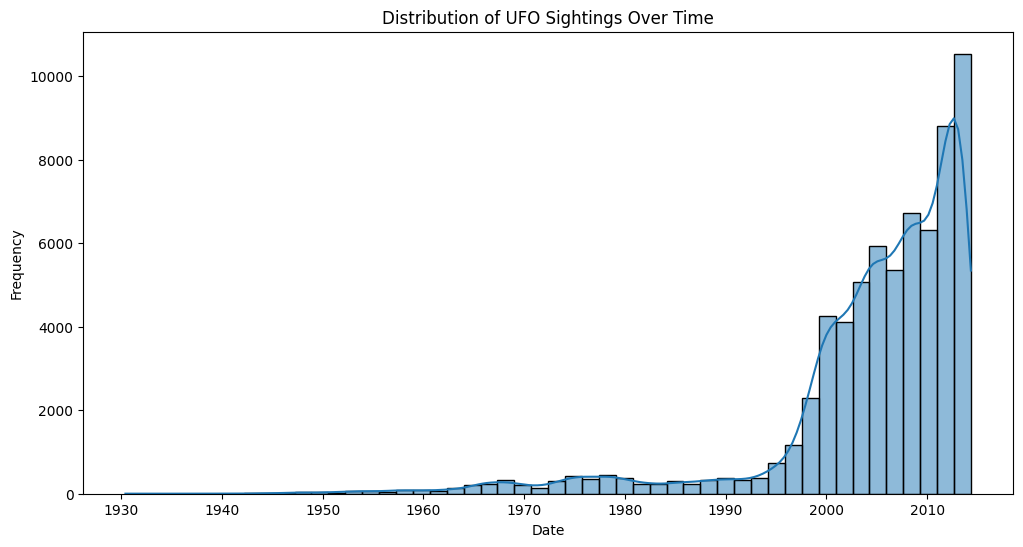

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of UFO sightings over time
plt.figure(figsize=(12, 6))
sns.histplot(data=ufo_data_usa, x='datetime', bins=50, kde=True)
plt.title('Distribution of UFO Sightings Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

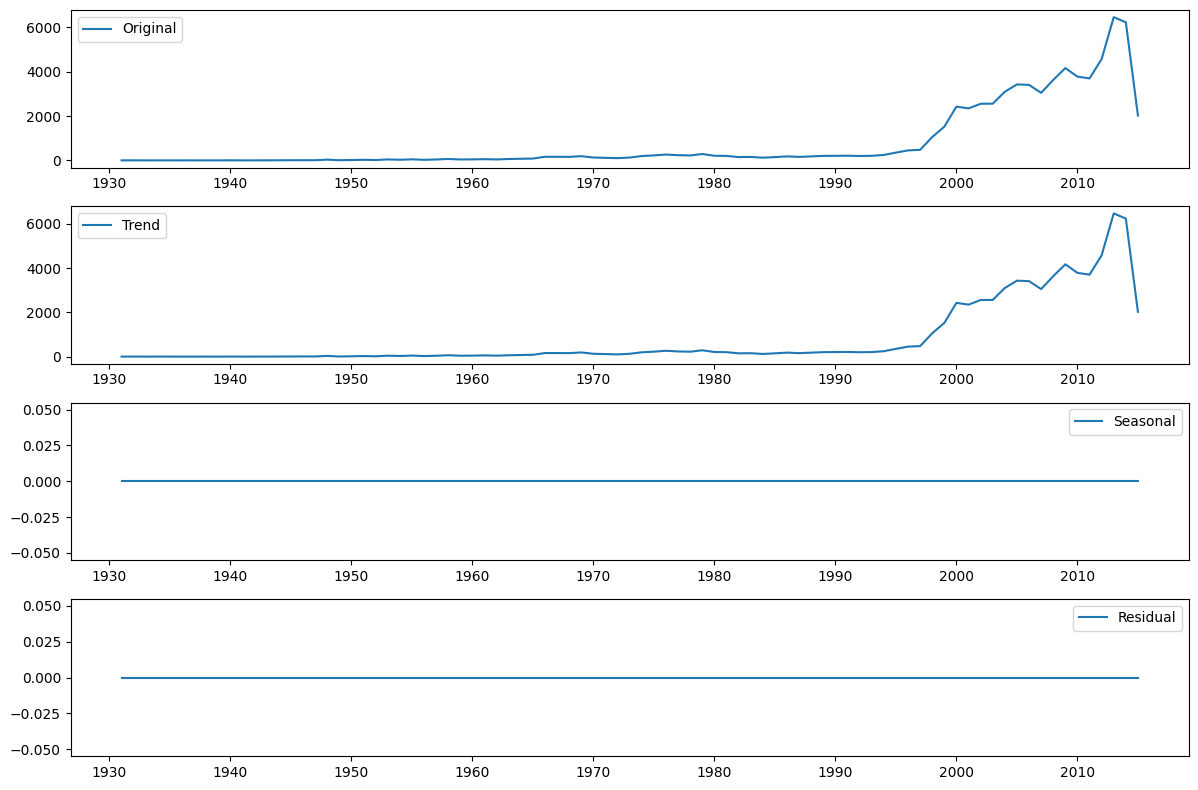

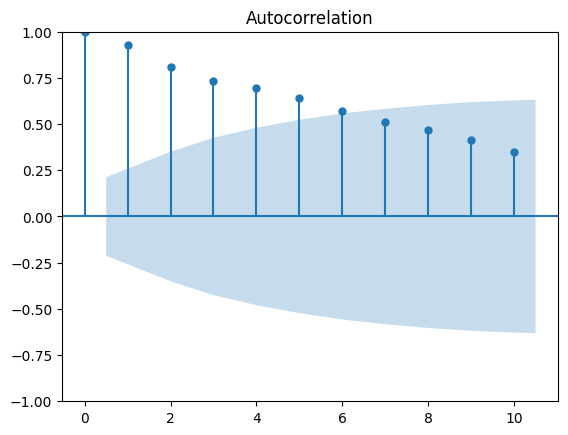

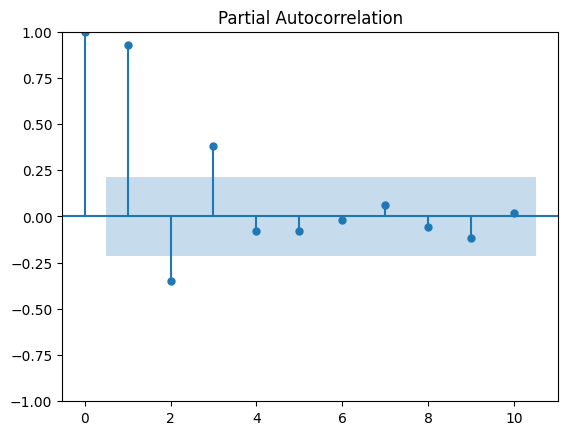

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set 'datetime' column as index
ufo_data_usa.set_index('datetime', inplace=True)

# Compute the frequency of sightings per year
sightings_per_year = ufo_data_usa.resample('Y').size()

# Decompose the time series with annual frequency
decomposition = sm.tsa.seasonal_decompose(sightings_per_year, model='additive', period=1)  # Period = 1 for annual frequency
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(sightings_per_year, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Analysis
sm.graphics.tsa.plot_acf(sightings_per_year, lags=10)
plt.show()

sm.graphics.tsa.plot_pacf(sightings_per_year, lags=10)
plt.show()

Identical 'Original' and 'Trend' plots implies that any systematic changes or movements in the data are minimal or negligible. This could indicate that the data is relatively stable over time without any significant upward or downward trends.

In the context of UFO sightings, it suggests that the frequency of sightings does not show a consistent increase or decrease over time within the analyzed period. This could have various interpretations, such as stable reporting patterns, no underlying changes in UFO activity, or limitations in the data collection process. 

The Seasonal and Residual plots indicate that the data does not exhibit any consistent periodic fluctuations or irregularities beyond what is captured by the trend component.

Possible interpretations of this finding could include:

- Lack of Seasonality: The data does not exhibit any regular seasonal patterns or cycles that repeat over time. This could imply that UFO sightings occur uniformly across different time periods without any specific seasonal trends.

- Stationarity: The data may be stationary, meaning that it does not exhibit any systematic changes or trends over time. In a stationary time series, the mean, variance, and autocorrelation structure remain constant over time.

- Data Limitations: The absence of discernible seasonality or residual patterns could also be attributed to limitations in the data collection process or the specific time period being analyzed. It's possible that the data does contain seasonality or residual patterns, but they are not captured effectively in the analysis.

Because UFO sightings are rare and seemingly sporadic, it makes sense that there is no "UFO season" where sightings typically occur.

The ACF plot shows a gradual decay and the PACF plot shows a sharp drop-off after a few lags, meaning that an autoregressive model may be suitable.

In [8]:
from statsmodels.tsa.stattools import adfuller

ufo_data_usa.reset_index(inplace=True)

# Group the data by datetime and count the number of sightings for each time period
sightings = ufo_data_usa.groupby(pd.Grouper(key='datetime', freq='Y')).size().reset_index(name='sightings')

# Conducting the Augmented Dickey-Fuller test to check for stationarity
adf_test = adfuller(sightings['sightings'])

# Outputting the results
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                 -4.417467
p-value                         0.000276
#Lags Used                     12.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64

- The test statistic is lower than the critical values at all significance levels.
- The p-value is very small (close to zero), indicating strong evidence against the null hypothesis.

Therefore, we reject the null hypothesis of non-stationarity and conclude that the time series is likely stationary.

In [9]:
import pandas as pd

# Assuming your DataFrame is named ufo_data_usa
# Convert 'datetime' column to datetime if it's not already in datetime format
ufo_data_usa['datetime'] = pd.to_datetime(ufo_data_usa['datetime'])

# Sort DataFrame by 'State' and 'datetime'
ufo_data_usa_sorted = ufo_data_usa.sort_values(by=['State', 'datetime'])

# Group DataFrame by 'State'
grouped_by_state = ufo_data_usa_sorted.groupby('State')

# Calculate time difference between consecutive sightings for each state
time_between_sightings = grouped_by_state['datetime'].diff()

# Convert timedelta to total days
time_between_sightings_seconds = time_between_sightings.dt.days

# Calculate average and standard deviation of time differences for each state
average_time_between_sightings = time_between_sightings_seconds.groupby(ufo_data_usa_sorted['State']).mean()
std_dev_time_between_sightings = time_between_sightings_seconds.groupby(ufo_data_usa_sorted['State']).std()

# Create a new DataFrame to store the calculated information
time_between_sightings_df = pd.DataFrame({
    'Average Time Between Sightings': average_time_between_sightings,
    'Standard Deviation of Time Between Sightings': std_dev_time_between_sightings
})

# Reset index to make 'State' a column instead of index
time_between_sightings_df.reset_index(inplace=True)

# Display the new DataFrame
print(time_between_sightings_df.head())
print()

# Print average time between sightings
print('Average time between sightings:', time_between_sightings_df['Average Time Between Sightings'].mean(),'days')

  State  Average Time Between Sightings  \
0    AK                      108.576037   
1    AL                       40.846154   
2    AR                       36.478673   
3    AZ                        9.089581   
4    CA                        2.654206   

   Standard Deviation of Time Between Sightings  
0                                    282.292672  
1                                    198.576392  
2                                    105.680420  
3                                     99.494971  
4                                     28.485839  

Average time between sightings: 43.85092999215683 days


/var/folders/y2/nnpdyztj42sft29s3dp0nybr0000gn/T/ipykernel_19923/876908042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_data_usa['datetime'] = pd.to_datetime(ufo_data_usa['datetime'])


In [10]:
# Assuming your DataFrame is named ufo_data_usa
# Convert 'datetime' column to datetime if it's not already in datetime format
ufo_data_usa['datetime'] = pd.to_datetime(ufo_data_usa['datetime'])

# Sort DataFrame by 'State' and 'datetime'
ufo_data_usa_sorted = ufo_data_usa.sort_values(by=['State', 'datetime'])

# Group DataFrame by 'State'
grouped_by_state = ufo_data_usa_sorted.groupby('State')

# Calculate time difference between consecutive sightings for each State
time_between_sightings = grouped_by_state['datetime'].diff()

# Convert timedelta to total days
time_between_sightings_seconds = time_between_sightings.dt.days

# Calculate average and standard deviation of time differences for each State
average_time_between_sightings = time_between_sightings_seconds.groupby(ufo_data_usa_sorted['State']).mean()
std_dev_time_between_sightings = time_between_sightings_seconds.groupby(ufo_data_usa_sorted['State']).std()

# Create a new DataFrame to store the calculated information
time_between_sightings_df = pd.DataFrame({
    'Average Time Between Sightings': average_time_between_sightings,
    'Standard Deviation of Time Between Sightings': std_dev_time_between_sightings
})

# Reset index to make 'State' a column instead of index
time_between_sightings_df.reset_index(inplace=True)

# Display the new DataFrame
print(time_between_sightings_df.head())
print()

# Print average time between sightings
print('Average time between sightings:', time_between_sightings_df['Average Time Between Sightings'].mean(),'days')
print()

# Find the index of the minimum value in the column 'Average Time Between Sightings'
min_avg_index = time_between_sightings_df['Average Time Between Sightings'].idxmin()

# Retrieve the corresponding State using the index
shortest_avg_time_state = time_between_sightings_df.loc[min_avg_index, 'State']

# Extract the corresponding information from time_between_sightings_df
shortest_avg_time_info = time_between_sightings_df.loc[min_avg_index]

# Filter the ufo_data_usa DataFrame for rows with the smallest_avg_time_state
Smatched_data = ufo_data_usa[ufo_data_usa['State'] == shortest_avg_time_state]

print("State with the smallest average time between sightings:", shortest_avg_time_state)
print("Average Time Between Sightings (Days):", shortest_avg_time_info['Average Time Between Sightings'])
print()

# Find the index of the maximum value in the column 'Average Time Between Sightings'
max_avg_index = time_between_sightings_df['Average Time Between Sightings'].idxmax()

# Retrieve the corresponding State using the index
longest_avg_time_state = time_between_sightings_df.loc[max_avg_index, 'State']

# Extract the corresponding information from time_between_sightings_df
longest_avg_time_info = time_between_sightings_df.loc[max_avg_index]

# Filter the ufo_data_usa DataFrame for rows with the longest_avg_time_state
Lmatched_data = ufo_data_usa[ufo_data_usa['State'] == longest_avg_time_state]

print("State with the smallest average time between sightings:", longest_avg_time_state)
print("Average Time Between Sightings (Days):", longest_avg_time_info['Average Time Between Sightings'])

/var/folders/y2/nnpdyztj42sft29s3dp0nybr0000gn/T/ipykernel_19923/2635871294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_data_usa['datetime'] = pd.to_datetime(ufo_data_usa['datetime'])


  State  Average Time Between Sightings  \
0    AK                      108.576037   
1    AL                       40.846154   
2    AR                       36.478673   
3    AZ                        9.089581   
4    CA                        2.654206   

   Standard Deviation of Time Between Sightings  
0                                    282.292672  
1                                    198.576392  
2                                    105.680420  
3                                     99.494971  
4                                     28.485839  

Average time between sightings: 43.85092999215683 days

State with the smallest average time between sightings: CA
Average Time Between Sightings (Days): 2.6542056074766354

State with the smallest average time between sightings: DC
Average Time Between Sightings (Days): 242.8021978021978


/var/folders/y2/nnpdyztj42sft29s3dp0nybr0000gn/T/ipykernel_19923/287624592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_data_usa['time_diff_days'] = ufo_data_usa['datetime'].diff().dt.days.fillna(0)


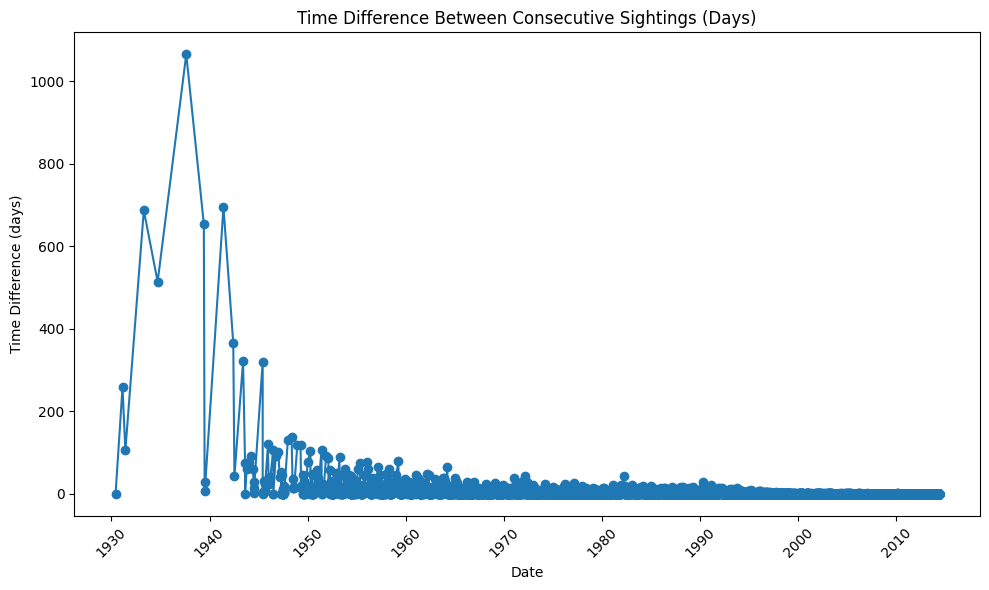

In [11]:
# Calculate time difference between consecutive sightings in days
ufo_data_usa['time_diff_days'] = ufo_data_usa['datetime'].diff().dt.days.fillna(0)

# Plotting the difference between consecutive sightings in days
plt.figure(figsize=(10, 6))
plt.plot(ufo_data_usa['datetime'], ufo_data_usa['time_diff_days'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Time Difference (days)')
plt.title('Time Difference Between Consecutive Sightings (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/y2/nnpdyztj42sft29s3dp0nybr0000gn/T/ipykernel_19923/216260204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_data_usa['datetime'] = pd.to_datetime(ufo_data_usa['datetime'])


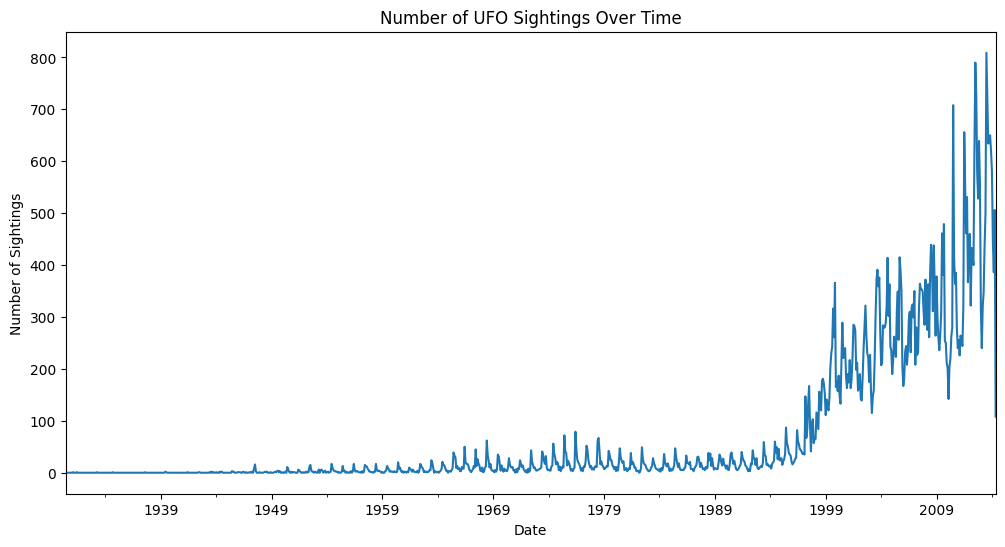

In [12]:
# Convert the datetime column to datetime format if it's not already
ufo_data_usa['datetime'] = pd.to_datetime(ufo_data_usa['datetime'])

# Group the data by datetime and count the number of sightings for each time period
sightings_over_time = ufo_data_usa.groupby(pd.Grouper(key='datetime', freq='M')).size()

# Plot the time series
plt.figure(figsize=(12, 6))
sightings_over_time.plot()
plt.title('Number of UFO Sightings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.show()


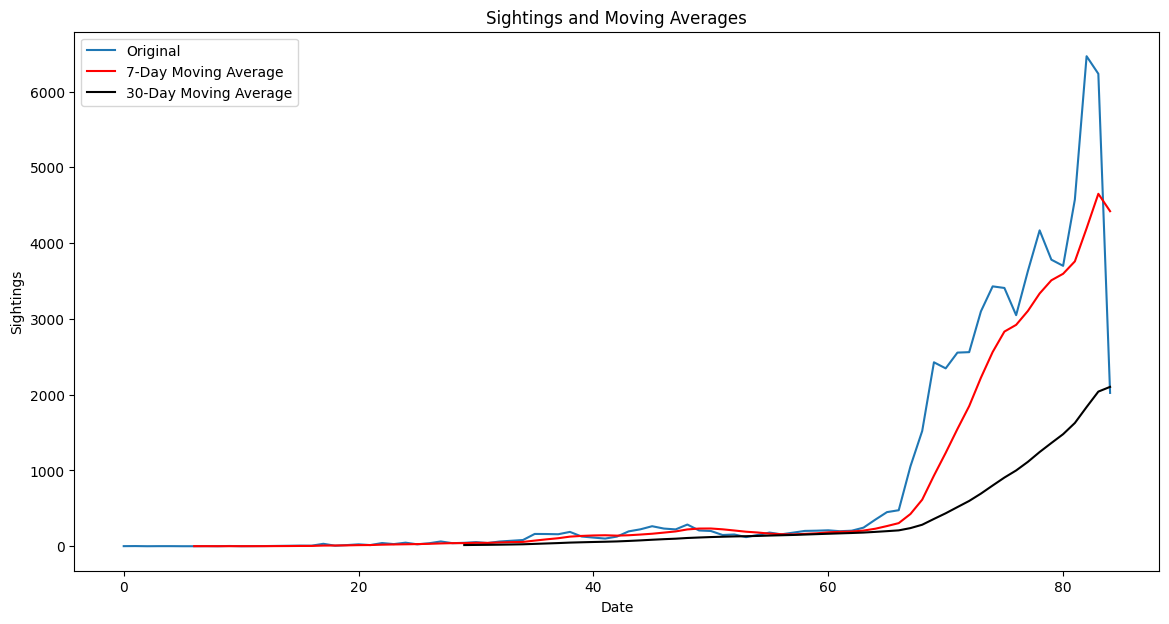

In [13]:
# Rolling - Calculating a 7 and 30-day moving average for the sightings data
sightings['7-Day MA'] = sightings['sightings'].rolling(window=7).mean()
# Rolling - Calculating a 7 and 30-day moving average for the sightings data
sightings['30-Day MA'] = sightings['sightings'].rolling(window=30).mean()


# Plotting the original sales data with the 7-day moving average
plt.figure(figsize=(14, 7))
plt.plot(sightings['sightings'], label='Original')
plt.plot(sightings['7-Day MA'], color='red', label='7-Day Moving Average')
plt.plot(sightings['30-Day MA'], color='black', label='30-Day Moving Average')
plt.title('Sightings and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sightings')
plt.legend()
plt.show()

# Models

In [14]:
# Group the data by datetime and count the number of sightings for each time period
sightings = ufo_data_usa.groupby(pd.Grouper(key='datetime', freq='M')).size().reset_index(name='sightings')

sightings.head()

,datetime,sightings
0,1930-06-30,1
1,1930-07-31,0
2,1930-08-31,0
3,1930-09-30,0
4,1930-10-31,0


In [15]:
# Find the highest amount of sightings in a month
max_avg = sightings['sightings'].idxmax()

# Retrieve the corresponding date using the index
max_avg_date = sightings.loc[max_avg, 'datetime']

# Display results
print("Highest amount of  sightings in a month:", max_avg)
print("Month/Year:", max_avg_date)
print()

# Find the average amount of sightings in a month
avg = sightings['sightings'].mean()

# Display results
print("Average amount of  sightings in a month:", avg)
print()

# Find the lowest amount of sightings in a month
min_avg = sightings['sightings'].idxmin()

# Retrieve the corresponding date using the index
min_avg_date = sightings.loc[min_avg, 'datetime']

# Display results
print("Lowest amount of  sightings in a month:", min_avg)
print("Month/Year:", min_avg_date)

Highest amount of  sightings in a month: 997
Month/Year: 2013-07-31 00:00:00

Average amount of  sightings in a month: 66.86607142857143

Lowest amount of  sightings in a month: 1
Month/Year: 1930-07-31 00:00:00


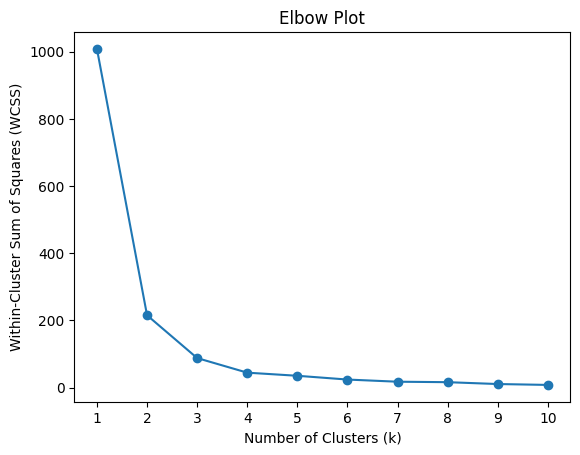

In [16]:
# Elbow plot for clusters
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Rescale the data
scaler = StandardScaler()
sightings['sightings_scaled'] = scaler.fit_transform(sightings[['sightings']])

# Extract the scaled sightings count data
X = sightings[['sightings_scaled']].values

# Initialize an empty list to store the within-cluster sum of squares (inertia) for different values of k
wcss = []

# Define the range of k values to test
k_values = range(1, 11)  # You can adjust the range as needed

# Calculate the within-cluster sum of squares (inertia) for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [17]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Based on elbow plot
sightings['cluster'] = kmeans.fit_predict(sightings[['sightings_scaled']])

# Optional: Inverse transform the scaled values if needed
# monthly_sightings_df['sightings_count'] = scaler.inverse_transform(monthly_sightings_df[['sightings_count_scaled']])

# Display the DataFrame with the cluster assignments
print(sightings)

       datetime  sightings  sightings_scaled  cluster
0    1930-06-30          1         -0.499609        1
1    1930-07-31          0         -0.507194        1
2    1930-08-31          0         -0.507194        1
3    1930-09-30          0         -0.507194        1
4    1930-10-31          0         -0.507194        1
...         ...        ...               ...      ...
1003 2014-01-31        579          3.884649        2
1004 2014-02-28        444          2.860644        2
1005 2014-03-31        386          2.420701        0
1006 2014-04-30        506          3.330928        2
1007 2014-05-31        108          0.312010        1

[1008 rows x 4 columns]


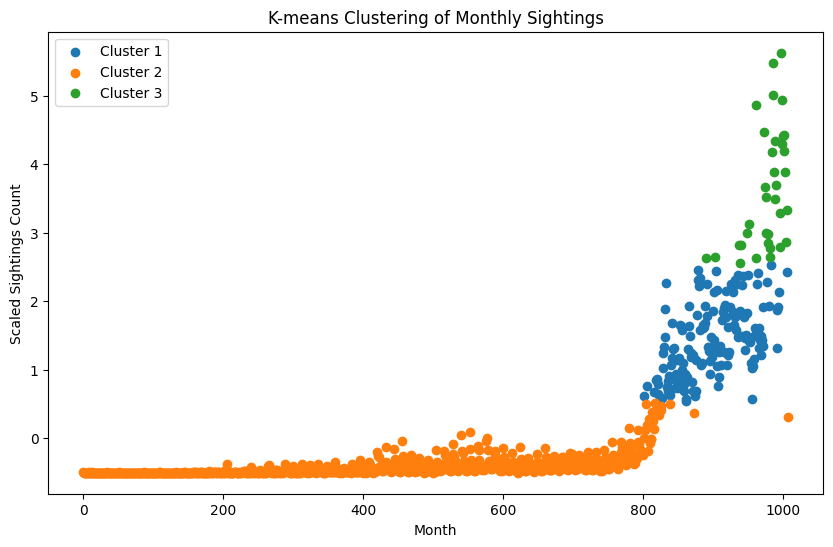

In [18]:
# Plot the clusters
plt.figure(figsize=(10, 6))

k = 3

for i in range(k):
    cluster_data = sightings[sightings['cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['sightings_scaled'], label=f'Cluster {i+1}')

plt.title('K-means Clustering of Monthly Sightings')
plt.xlabel('Month')
plt.ylabel('Scaled Sightings Count')
plt.legend()
plt.show()

The clusters seem to follow the slow, boring period of 1930 ~ 1994, then the spike from 1995 to 2008, and then the huge boom from 2009 to 2014.

In [20]:
from datetime import timedelta

# Choose the cluster for which you want to predict the next sighting
target_cluster = 2  

# Filter the data for sightings in the target cluster
cluster_data = sightings[sightings['cluster'] == target_cluster]

# Assuming the data is sorted by datetime, you can get the latest sighting date
latest_sighting_date = cluster_data['datetime'].max()

# Calculate the average time between sightings within this cluster
average_time_between_sightings = cluster_data['datetime'].diff().mean()

# Predict the next sighting date
predicted_next_sighting_date = latest_sighting_date + average_time_between_sightings

print("Predicted next sighting date:", predicted_next_sighting_date)
print()
print('Last recorded sighting in data frame:')
print(ufo_data_usa.iloc[-1, :3])

Predicted next sighting date: 2014-08-11 19:03:31.764705882

Last recorded sighting in data frame:
datetime    2014-05-08 00:00:00
city                    Memphis
state                        TN
Name: 67400, dtype: object


In [21]:
from datetime import datetime, timedelta

# Assuming today's date is the current date
current_date = datetime.now()

# Predict the next sighting date starting from today 3/18/2024
predicted_next_sighting_date = current_date + average_time_between_sightings

print("Predicted next sighting date (starting from today):", predicted_next_sighting_date)

Predicted next sighting date (starting from today): 2024-06-30 08:41:21.879390


In [23]:
# Count the occurrences of each city in the original ufo_data_usa DataFrame
city_counts = ufo_data_usa['city'].value_counts()

# Find the most common city
most_common_city = city_counts.idxmax()

# Extract the corresponding State and County from the original data
most_common_state = ufo_data_usa.loc[ufo_data_usa['city'] == most_common_city, 'State'].iloc[0]
most_common_county = ufo_data_usa.loc[ufo_data_usa['city'] == most_common_city, 'County Name'].iloc[0]

# Get the total number of sightings for the most common city
total_sightings = city_counts[most_common_city]

# Print the most common city, corresponding state, county, and total number of sightings
print("Most common City:", most_common_city)
print("Corresponding State:", most_common_state)
print("Corresponding County:", most_common_county)
print("Total number of sightings in", most_common_city, ":", total_sightings)

Most common City: Seattle
Corresponding State: WA
Corresponding County: King County
Total number of sightings in Seattle : 469


In [24]:
# Group the data by datetime and Lat/Lon and count the number of sightings for each time period and FIPS code
sightings_by_coordinates = ufo_data_usa.groupby([pd.Grouper(key='datetime', freq='M'), 'latitude', 'longitude']).size().reset_index(name='sightings')

sightings_by_coordinates.head()

,datetime,latitude,longitude,sightings
0,1930-06-30,42.509167,-76.393804,1
1,1931-02-28,40.584444,-102.301944,1
2,1931-06-30,38.917222,-97.213611,1
3,1933-04-30,40.759941,-73.849168,1
4,1934-09-30,46.923333,-98.002778,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Prepare features and target variables
X = sightings_by_coordinates[['latitude', 'longitude']]  # Features
y_lat = sightings_by_coordinates['latitude']  # Target variable (latitude)
y_lon = sightings_by_coordinates['longitude']  # Target variable (longitude)

# Split the data into training and testing sets
X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(X, y_lat, y_lon, test_size=0.2, random_state=42)

# Train linear regression models for latitude and longitude separately
reg_lat = LinearRegression()
reg_lat.fit(X_train, y_lat_train)

reg_lon = LinearRegression()
reg_lon.fit(X_train, y_lon_train)

# Extract features for the next sighting from your data
next_sighting_features = sightings_by_coordinates.iloc[-1][['latitude', 'longitude']].values.reshape(1, -1)

# Predict latitude and longitude for the next UFO sighting
next_lat_prediction = reg_lat.predict(next_sighting_features)
next_lon_prediction = reg_lon.predict(next_sighting_features)

print("Predicted latitude for the next sighting:", next_lat_prediction)
print("Predicted longitude for the next sighting:", next_lon_prediction)

# Define a threshold for matching latitudes and longitudes
threshold = 0.1  # Adjust as needed based on your data and model accuracy

# Find matching rows in ufo_data_usa
matching_rows = ufo_data_usa[
    (abs(ufo_data_usa['latitude'] - next_lat_prediction) <= threshold) &
    (abs(ufo_data_usa['longitude'] - next_lon_prediction) <= threshold)
]
# Select just one matching row (the first one, for example)
matching_row = matching_rows.iloc[0]

# Print the matching city and state
matching_city = matching_row['city']
matching_state = matching_row['state']

print("Location:", matching_city, matching_state)


# Evaluate the model
y_lat_pred = reg_lat.predict(X_test)
y_lon_pred = reg_lon.predict(X_test)

mse_lat = mean_squared_error(y_lat_test, y_lat_pred)
mse_lon = mean_squared_error(y_lon_test, y_lon_pred)

print("Mean Squared Error (Latitude):", mse_lat)
print("Mean Squared Error (Longitude):", mse_lon)

Predicted latitude for the next sighting: [46.9966667]
Predicted longitude for the next sighting: [-120.5466667]
Location: Ellensburg (South Of)) WA
Mean Squared Error (Latitude): 7.741127231675609e-31
Mean Squared Error (Longitude): 9.85739125556265e-29


/Users/victoriahaley/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/victoriahaley/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# THE NEXT UFO SIGHTING WILL HAPPEN ON APRIL 28TH, 2024 IN ELLENSBURG, WA

Note: The date changes everytime the model is run because of the math behind the model.

Below are the other regression models that were run on the latitude/longitude predictions.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare features and target variables
X = sightings_by_coordinates[['latitude', 'longitude']]  # Features
y_lat = sightings_by_coordinates['latitude']  # Target variable (latitude)
y_lon = sightings_by_coordinates['longitude']  # Target variable (longitude)

# Split the data into training and testing sets
X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(X, y_lat, y_lon, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor for latitude
reg_lat = RandomForestRegressor(n_estimators=100, random_state=42)
reg_lat.fit(X_train, y_lat_train)

# Initialize and train a Random Forest Regressor for longitude
reg_lon = RandomForestRegressor(n_estimators=100, random_state=42)
reg_lon.fit(X_train, y_lon_train)

# Make predictions on the testing set
y_lat_pred = reg_lat.predict(X_test)
y_lon_pred = reg_lon.predict(X_test)

# Evaluate the model
mse_lat = mean_squared_error(y_lat_test, y_lat_pred)
mse_lon = mean_squared_error(y_lon_test, y_lon_pred)

print("Mean Squared Error (Latitude):", mse_lat)
print("Mean Squared Error (Longitude):", mse_lon)

Mean Squared Error (Latitude): 1.3190029768825625e-05
Mean Squared Error (Longitude): 0.00016442051192016774


In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare features and target variables
X = sightings_by_coordinates[['latitude', 'longitude']]  # Features
y_lat = sightings_by_coordinates['latitude']  # Target variable (latitude)
y_lon = sightings_by_coordinates['longitude']  # Target variable (longitude)

# Split the data into training and testing sets
X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(X, y_lat, y_lon, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Regressor for latitude
reg_lat = SVR(kernel='rbf')
reg_lat.fit(X_train, y_lat_train)

# Initialize and train a Support Vector Regressor for longitude
reg_lon = SVR(kernel='rbf')
reg_lon.fit(X_train, y_lon_train)

# Make predictions on the testing set
y_lat_pred = reg_lat.predict(X_test)
y_lon_pred = reg_lon.predict(X_test)

# Evaluate the model
mse_lat = mean_squared_error(y_lat_test, y_lat_pred)
mse_lon = mean_squared_error(y_lon_test, y_lon_pred)

print("Mean Squared Error (Latitude):", mse_lat)
print("Mean Squared Error (Longitude):", mse_lon)

Mean Squared Error (Latitude): 0.03419574237205408
Mean Squared Error (Longitude): 0.06464941401996009
